# Exploratory data analysis of Breast Cancer Wisconsin Diagnostic data set

This notebook conducts an Exploratory Data Analysis (EDA) on the Breast Cancer Wisconsin (Diagnostic) dataset. 

The primary goals of this EDA are to:
1. Understand the structure and characteristics of the data.
2. Visualize the distributions of key features.
3. Analyze the relationships and correlations between different variables.
4. Identify potential data quality issues, such as missing values or outliers.
5. Form initial hypotheses that will guide the subsequent data preprocessing and feature engineering stages.

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pd.set_option('display.float_format', '{:f}'.format)

# Set some plotting styles for better visuals
sns.set_style('whitegrid')
%matplotlib inline

# Define the path to save figures
FIGURES_PATH = '../reports/figures/'

In [109]:
data_path = "../data/data.csv"
df = pd.read_csv(data_path)

## 1. Initial data exploration

In [110]:
display(df.head())

print("\nDataframe info:")
df.info()

print(f"\nColumn names: {df.columns.tolist()}")

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.990000,10.380000,122.800000,1001.000000,0.118400,0.277600,0.300100,0.147100,0.241900,0.078710,1.095000,0.905300,8.589000,153.400000,0.006399,0.049040,0.053730,0.015870,0.030030,0.006193,25.380000,17.330000,184.600000,2019.000000,0.162200,0.665600,0.711900,0.265400,0.460100,0.118900,NaN
1,842517,M,20.570000,17.770000,132.900000,1326.000000,0.084740,0.078640,0.086900,0.070170,0.181200,0.056670,0.543500,0.733900,3.398000,74.080000,0.005225,0.013080,0.018600,0.013400,0.013890,0.003532,24.990000,23.410000,158.800000,1956.000000,0.123800,0.186600,0.241600,0.186000,0.275000,0.089020,NaN
2,84300903,M,19.690000,21.250000,130.000000,1203.000000,0.109600,0.159900,0.197400,0.127900,0.206900,0.059990,0.745600,0.786900,4.585000,94.030000,0.006150,0.040060,0.038320,0.020580,0.022500,0.004571,23.570000,25.530000,152.500000,1709.000000,0.144400,0.424500,0.450400,0.243000,0.361300,0.087580,NaN
3,84348301,M,11.420000,20.380000,77.580000,386.100000,0.142500,0.283900,0.241400,0.105200,0.259700,0.097440,0.495600,1.156000,3.445000,27.230000,0.009110,0.074580,0.056610,0.018670,0.059630,0.009208,14.910000,26.500000,98.870000,567.700000,0.209800,0.866300,0.686900,0.257500,0.663800,0.173000,NaN
4,84358402,M,20.290000,14.340000,135.100000,1297.000000,0.100300,0.132800,0.198000,0.104300,0.180900,0.058830,0.757200,0.781300,5.438000,94.440000,0.011490,0.024610,0.056880,0.018850,0.017560,0.005115,22.540000,16.670000,152.200000,1575.000000,0.137400,0.205000,0.400000,0.162500,0.236400,0.076780,NaN



Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter

In [111]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_wors

Column "Unnamed: 32" has 569 missing values, which represents the 100% of the data, so it can be dropped. Column "id" is an identifier and does not provide any information about the patient, so it can be dropped too.

Column "diagnosis" is the target variable. I'll map the values to 0 and 1 for convenience.

## 2. Target variable analysis

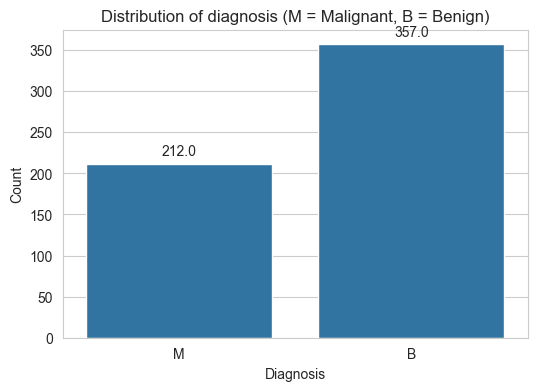

diagnosis
B   0.627417
M   0.372583
Name: proportion, dtype: float64


In [112]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='diagnosis', data=df)

# Add counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')

plt.title('Distribution of diagnosis (M = Malignant, B = Benign)')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.savefig(f'{FIGURES_PATH}diagnosis_distribution.png', dpi=300)
plt.show()

# Proportion of malignant and benign cases
print(df['diagnosis'].value_counts(normalize=True))

The target variable is imbalanced, but not severely.

## 3. Summary statistics

In [113]:
pd.set_option('display.max_columns', None) # Just to show all columns
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
id,569.000000,30371831.432337,125020585.612224,8670.000000,869218.000000,906024.000000,8813129.000000,911320502.000000
radius_mean,569.000000,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.110000
texture_mean,569.000000,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.280000
perimeter_mean,569.000000,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.500000
area_mean,569.000000,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.000000
smoothness_mean,569.000000,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.163400
compactness_mean,569.000000,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.345400
concavity_mean,569.000000,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.426800
concave points_mean,569.000000,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.201200
symmetry_mean,569.000000,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.304000


There are great differences in the scale of the features, so a feature scaling technique is needed. I'll use StandardScaler.

## 4. Correlation analysis

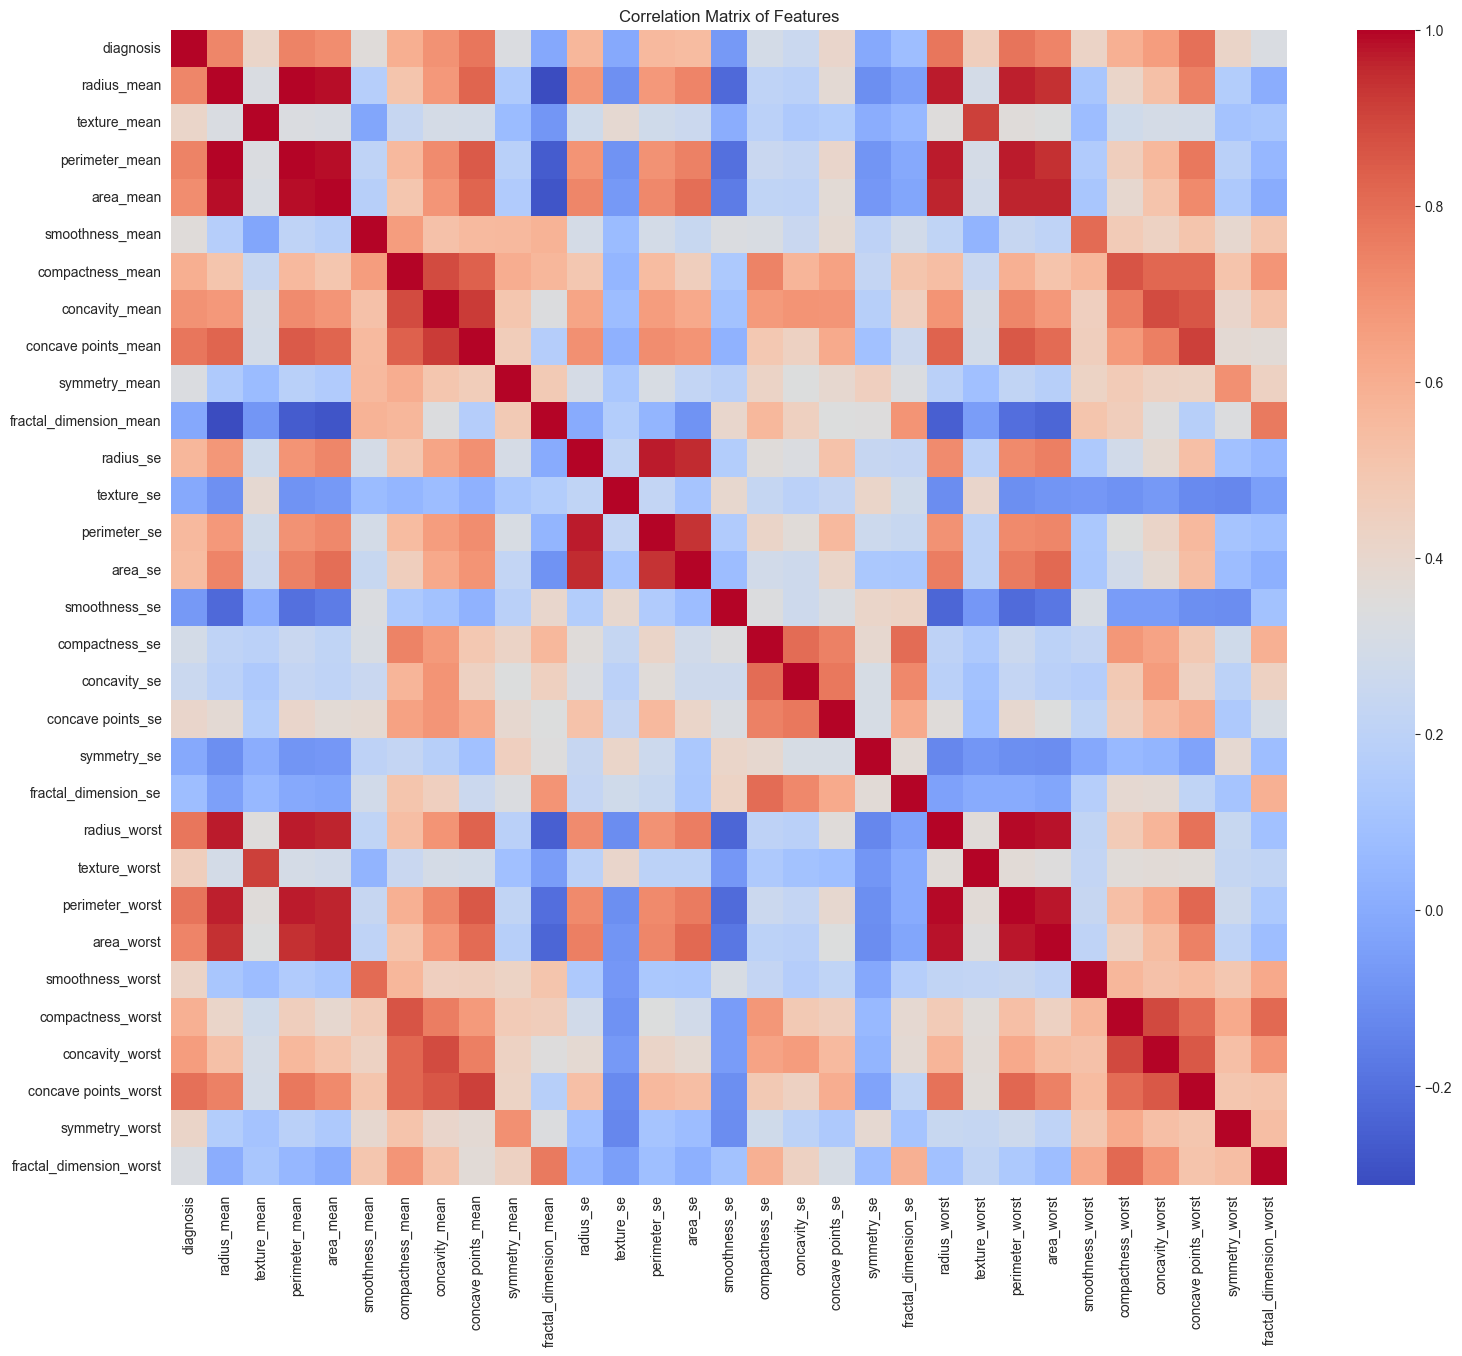

In [114]:
# First, I'll map the diagnosis to a numerical format for correlation calculation
df_corr = df.copy()
df_corr['diagnosis'] = df_corr['diagnosis'].map({'M': 1, 'B': 0})

# Drop the ID and the empty column
df_corr = df_corr.drop(['id', 'Unnamed: 32'], axis=1)

corr_matrix = df_corr.corr()

plt.figure(figsize=(18, 15))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False) # annot=False because there are too many features
plt.title('Correlation Matrix of Features')
plt.savefig(f'{FIGURES_PATH}correlation_matrix.png', dpi=300)
plt.show()

There's a strong correlation between features involving radius, perimeter and area of tumors, which is expected. Let's see the features with the strongest correlation with 'radius_mean'.

In [115]:
corr_with_radius_mean = corr_matrix['radius_mean']

# Calculate the absolute value of the correlations to measure the strength
abs_corr_with_radius_mean = corr_with_radius_mean.abs()

# Sort the absolute correlations in descending order (from highest to lowest)
most_correlated_features_radius_mean = abs_corr_with_radius_mean.sort_values(ascending=False)

print("Features sorted by it's correlation with 'radius_mean':")
display(most_correlated_features_radius_mean)

Features sorted by it's correlation with 'radius_mean':


radius_mean               1.000000
perimeter_mean            0.997855
area_mean                 0.987357
radius_worst              0.969539
perimeter_worst           0.965137
area_worst                0.941082
concave points_mean       0.822529
concave points_worst      0.744214
area_se                   0.735864
diagnosis                 0.730029
radius_se                 0.679090
concavity_mean            0.676764
perimeter_se              0.674172
concavity_worst           0.526911
compactness_mean          0.506124
compactness_worst         0.413463
concave points_se         0.376169
texture_mean              0.323782
fractal_dimension_mean    0.311631
texture_worst             0.297008
smoothness_se             0.222600
compactness_se            0.206000
concavity_se              0.194204
smoothness_mean           0.170581
symmetry_worst            0.163953
symmetry_mean             0.147741
smoothness_worst          0.119616
symmetry_se               0.104321
texture_se          

The features with the strongest correlation with 'radius_mean' are 'perimeter_mean' and 'area_mean'. This is expected because the perimeter and area of a circle are directly proportional to its radius. This also suggests that this features are redundant and good candidates for feature reduction.

Let's look at the features with the strongest correlation with 'diagnosis'.

In [116]:
corr_with_diagnosis = corr_matrix['diagnosis']

# Calculate the absolute value of the correlations to measure the strength
abs_corr_with_diagnosis = corr_with_diagnosis.abs()

# Sort the absolute correlations in descending order (from highest to lowest)
most_correlated_features_diagnosis = abs_corr_with_diagnosis.sort_values(ascending=False)

print("Features sorted by it's correlation with 'diagnosis':")
display(most_correlated_features_diagnosis)

Features sorted by it's correlation with 'diagnosis':


diagnosis                 1.000000
concave points_worst      0.793566
perimeter_worst           0.782914
concave points_mean       0.776614
radius_worst              0.776454
perimeter_mean            0.742636
area_worst                0.733825
radius_mean               0.730029
area_mean                 0.708984
concavity_mean            0.696360
concavity_worst           0.659610
compactness_mean          0.596534
compactness_worst         0.590998
radius_se                 0.567134
perimeter_se              0.556141
area_se                   0.548236
texture_worst             0.456903
smoothness_worst          0.421465
symmetry_worst            0.416294
texture_mean              0.415185
concave points_se         0.408042
smoothness_mean           0.358560
symmetry_mean             0.330499
fractal_dimension_worst   0.323872
compactness_se            0.292999
concavity_se              0.253730
fractal_dimension_se      0.077972
smoothness_se             0.067016
fractal_dimension_me

The last 5 features (correlation < 0.10), mostly add noise to the model, they are also candidates for feature reduction.

Features to be dropped: I'll drop the features with low correlation with the target variable, but keep the ones highly correlated with each other, like 'radius_mean' and 'perimeter_mean'. These will be handled by PCA.

So, the features to be dropped are:
- fractal_dimension_se      
- smoothness_se             
- fractal_dimension_mean    
- texture_se                
- symmetry_se               

## 5. Feature distributions by diagnosis

In [117]:
df_corr = df.copy()
df_corr['diagnosis'] = df_corr['diagnosis'].map({'M': 1, 'B': 0})

# Drop non-numeric or irrelevant columns
if 'id' in df_corr.columns:
    df_corr = df_corr.drop('id', axis=1)
if 'Unnamed: 32' in df_corr.columns:
    df_corr = df_corr.drop('Unnamed: 32', axis=1)

# Calculate most correlated features with 'diagnosis'
corr_with_target = df_corr.corr()['diagnosis'].abs().sort_values(ascending=False)

# Select top 5 features
top_5_features = corr_with_target.index[1:6] # First index is 'diagnosis'
print("Top 5 most correlated features with diagnosis:")
print(top_5_features)

Top 5 most correlated features with diagnosis:
Index(['concave points_worst', 'perimeter_worst', 'concave points_mean',
       'radius_worst', 'perimeter_mean'],
      dtype='object')


From the EDA, we know that this features with very different scales, so we'll separate them into small scale and large scale for better plotting.

Plotting features with large scales: ['perimeter_worst', 'radius_worst', 'perimeter_mean']
Plotting features with small scales: ['concave points_worst', 'concave points_mean']


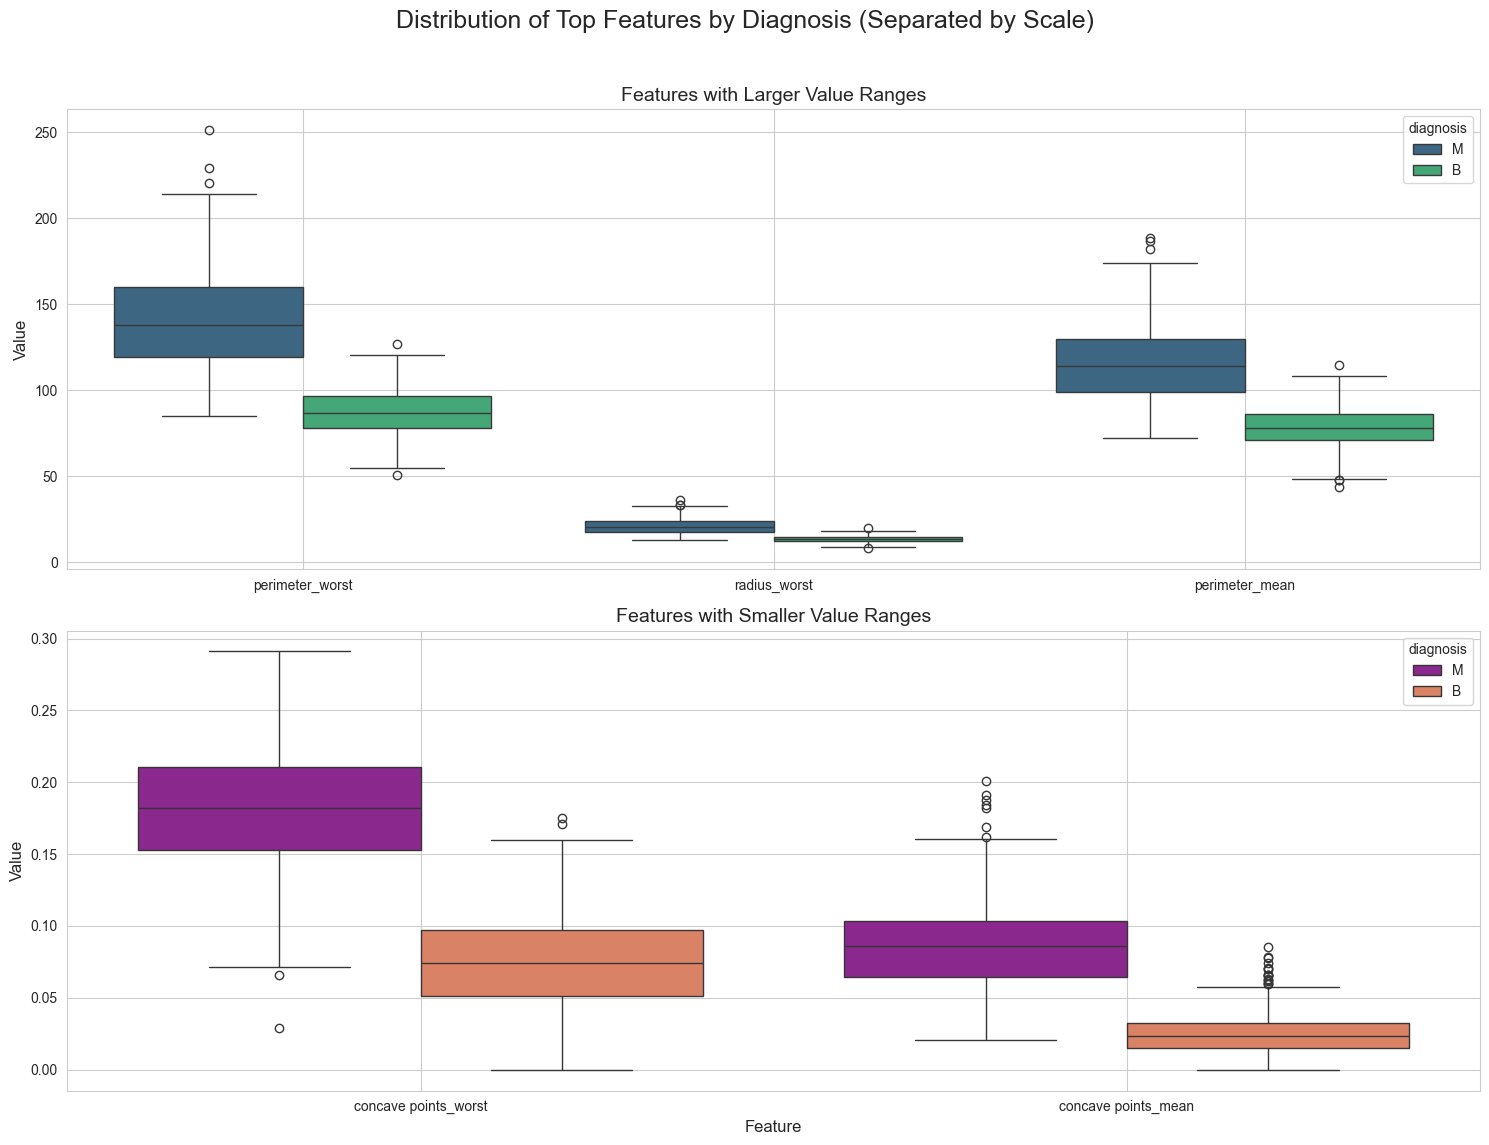

In [118]:
features_large_scale = ['perimeter_worst', 'radius_worst', 'perimeter_mean']
features_small_scale = ['concave points_worst', 'concave points_mean']

print("Plotting features with large scales:", features_large_scale)
print("Plotting features with small scales:", features_small_scale)


df_melted_large = pd.melt(df, 
                          id_vars="diagnosis", 
                          value_vars=features_large_scale,
                          var_name="feature", 
                          value_name="value")

df_melted_small = pd.melt(df, 
                          id_vars="diagnosis", 
                          value_vars=features_small_scale,
                          var_name="feature", 
                          value_name="value")

# We create a figure with 2 rows and 1 column of plots
fig, axes = plt.subplots(2, 1, figsize=(15, 12))
fig.suptitle('Distribution of Top Features by Diagnosis (Separated by Scale)', fontsize=18)

# Plot 1: Large Scale Features
sns.boxplot(ax=axes[0], x="feature", y="value", hue="diagnosis", data=df_melted_large, palette="viridis")
axes[0].set_title('Features with Larger Value Ranges', fontsize=14)
axes[0].set_xlabel('') # Remove x-axis label for the top plot for cleanliness
axes[0].set_ylabel('Value', fontsize=12)
axes[0].grid(True)

# Plot 2: Small Scale Features
sns.boxplot(ax=axes[1], x="feature", y="value", hue="diagnosis", data=df_melted_small, palette="plasma")
axes[1].set_title('Features with Smaller Value Ranges', fontsize=14)
axes[1].set_xlabel('Feature', fontsize=12)
axes[1].set_ylabel('Value', fontsize=12)
axes[1].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.96]) # Adjust layout to make room for the suptitle
plt.savefig(f'{FIGURES_PATH}feature_distribution_with_target_boxplots.png', dpi=300)
plt.show()

Let's also create a pairplot of the top 5 figures:

Generating pair plot for top 5 features. This may take a moment...


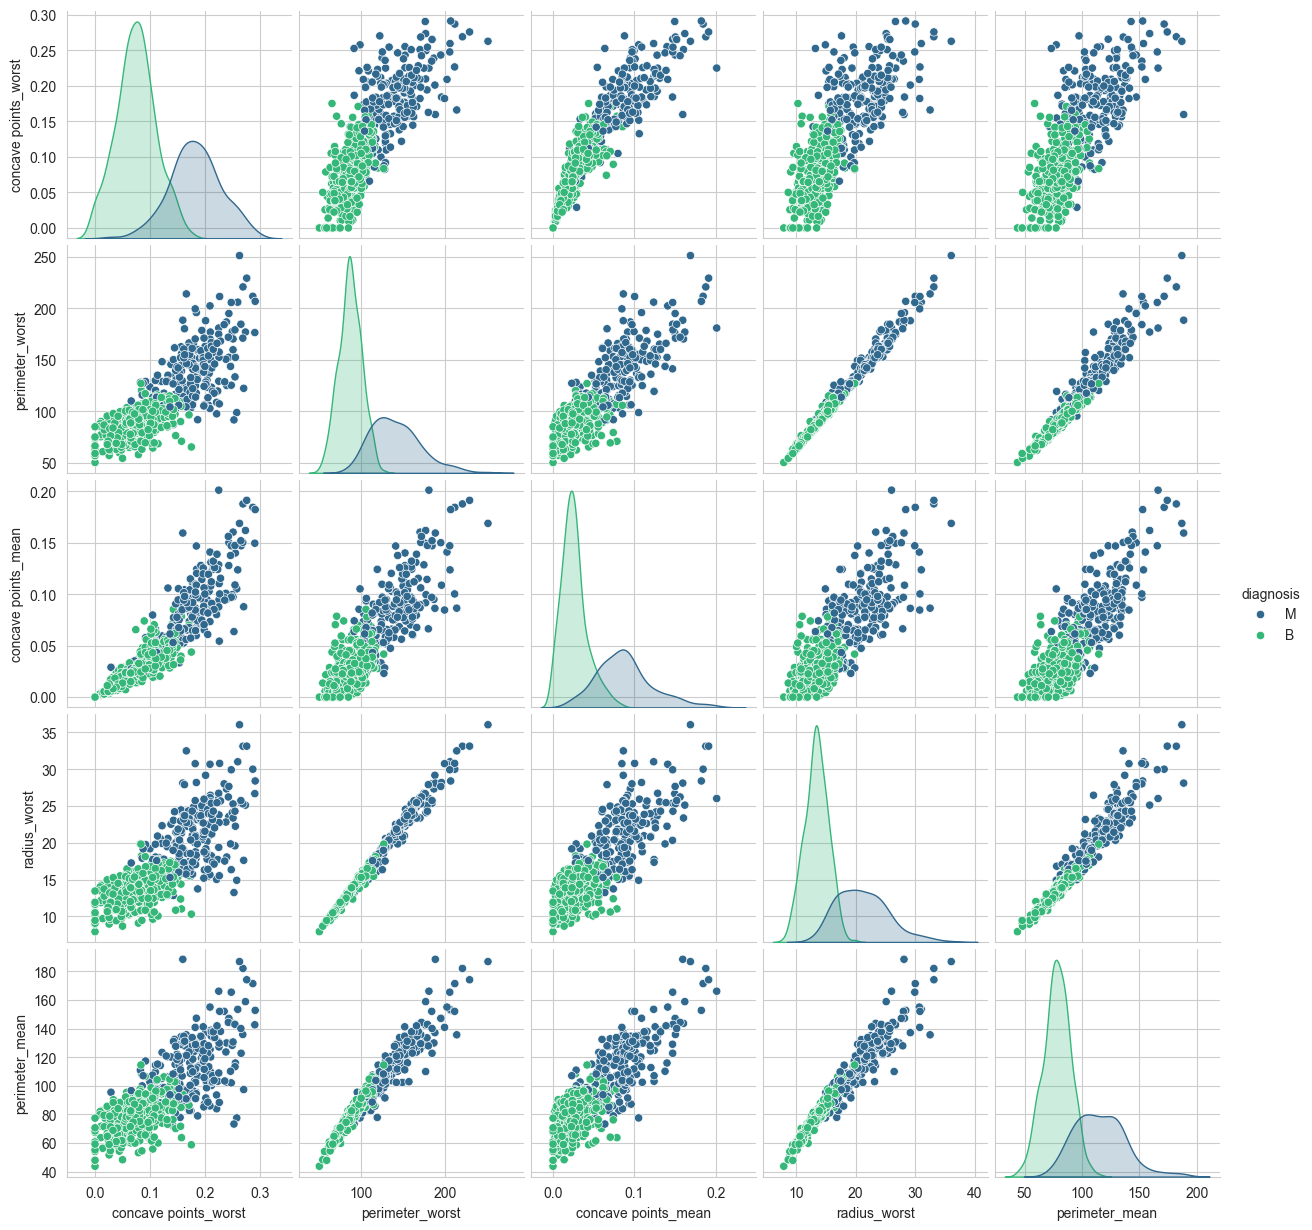

In [119]:
top_5_features_with_diagnosis = top_5_features.tolist() + ['diagnosis']
df_pairplot = df[top_5_features_with_diagnosis]

print("Generating pair plot for top 5 features. This may take a moment...")

# The 'hue' parameter colors the data points by the 'diagnosis' column
sns.pairplot(df_pairplot, hue='diagnosis', palette='viridis', diag_kind='kde')
plt.savefig(f'{FIGURES_PATH}top_features_pairplot.png', dpi=300)
plt.show()

### Key observations from feature distribution plots

1.  **All these features are highly predictive:** Every feature visualized shows a clear and significant difference in its value distribution between Malignant (M) and Benign (B) tumors, confirming their high predictive power.

2.  **Malignant tumors are consistently larger:** Size-related features like `perimeter_worst` and `radius_worst` are consistently higher for malignant cases, with minimal overlap between the two diagnostic groups.

3.  **Concave points are a critical differentiator:** The `concave points` features show a dramatic separation between classes, with malignant tumors having substantially higher values. This makes them one of the most important indicators.

4.  **High confidence in model separability:** The distinct separation of distributions suggests that even a simple machine learning model will be able to effectively learn a boundary to distinguish between malignant and benign cases with high accuracy.

5.  **Visual confirmation of redundancy:** The fact that all size-related features tell the same story (malignant bigger than benign) visually confirms they are measuring a similar underlying concept. This further suggests the use of PCA to handle multicollinearity in the dataset.

## 6. Principal component analysis

Dropping 5 noisy features before PCA.
Variance explained by PC1: 52.39%
Variance explained by PC2: 17.18%
Total variance explained by first two components: 69.57%


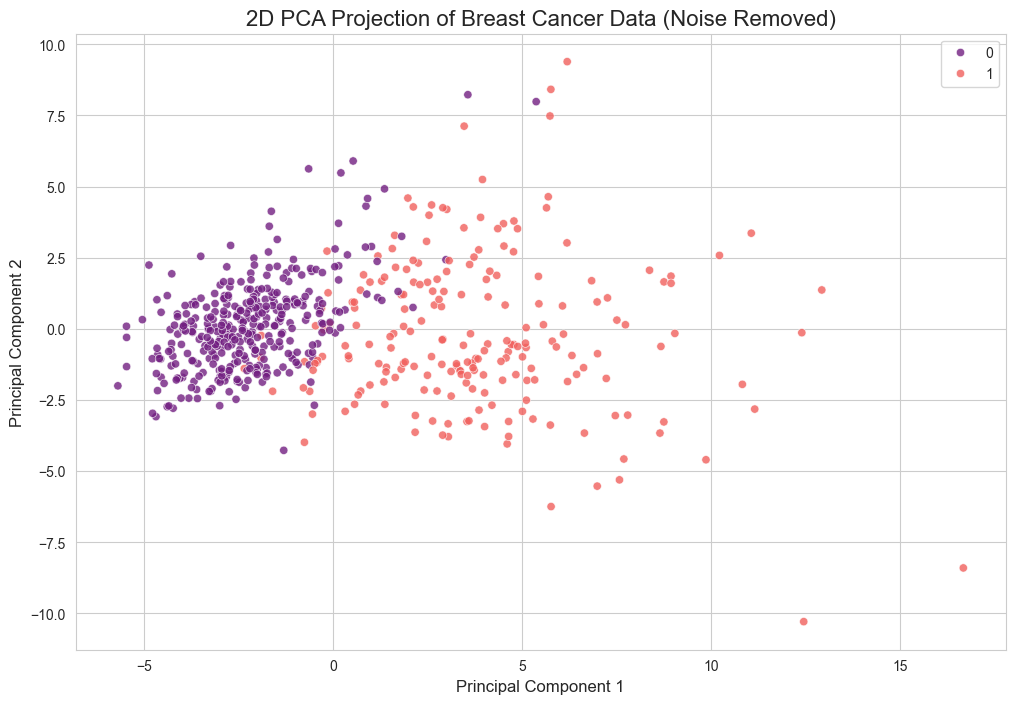

In [120]:
# Select all numeric features
features = df_corr.select_dtypes(include='number').drop('diagnosis', axis=1, errors='ignore')
diagnosis = df_corr['diagnosis']

features_to_drop = [
    'fractal_dimension_se',
    'smoothness_se',
    'fractal_dimension_mean',
    'texture_se',
    'symmetry_se'
]
print(f"Dropping {len(features_to_drop)} noisy features before PCA.")
features_cleaned = features.drop(columns=features_to_drop)

# Scale the cleaned features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_cleaned)

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)

# Create a new DataFrame with the principal components
df_pca = pd.DataFrame(data=principal_components, columns=['PC_1', 'PC_2'])
df_pca['diagnosis'] = diagnosis

print(f"Variance explained by PC1: {pca.explained_variance_ratio_[0]:.2%}")
print(f"Variance explained by PC2: {pca.explained_variance_ratio_[1]:.2%}")
print(f"Total variance explained by first two components: {sum(pca.explained_variance_ratio_):.2%}")

# Plot the results
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC_1', y='PC_2', hue='diagnosis', data=df_pca, alpha=0.8, palette='magma')

plt.title('2D PCA Projection of Breast Cancer Data (Noise Removed)', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.grid(True)
plt.legend()
plt.savefig(f'{FIGURES_PATH}pca_2d_projection.png', dpi=300)
plt.show()

Let's add an extra principal component to add more captured variance.

Dropping 5 noisy features before PCA.
Variance explained by PC1: 52.39%
Variance explained by PC2: 17.18%
Variance explained by PC3: 7.85%
Total variance explained by first three components: 77.42%


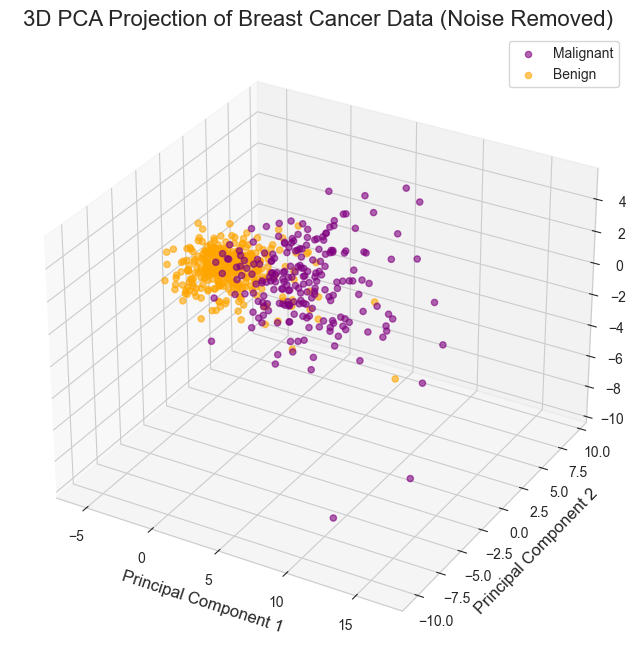

In [121]:
features = df_corr.select_dtypes(include='number').drop('diagnosis', axis=1, errors='ignore')
diagnosis = df_corr['diagnosis']

features_to_drop = [
    'fractal_dimension_se',
    'smoothness_se',
    'fractal_dimension_mean',
    'texture_se',
    'symmetry_se'
]
print(f"Dropping {len(features_to_drop)} noisy features before PCA.")
features_cleaned = features.drop(columns=features_to_drop)

# Scale the cleaned features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_cleaned)

# Apply PCA to reduce to 3 dimensions
pca = PCA(n_components=3)
principal_components = pca.fit_transform(features_scaled)

# Create a new DataFrame with the three principal components
df_pca = pd.DataFrame(data=principal_components, columns=['PC_1', 'PC_2', 'PC_3'])
df_pca['diagnosis'] = diagnosis

print(f"Variance explained by PC1: {pca.explained_variance_ratio_[0]:.2%}")
print(f"Variance explained by PC2: {pca.explained_variance_ratio_[1]:.2%}")
print(f"Variance explained by PC3: {pca.explained_variance_ratio_[2]:.2%}")
print(f"Total variance explained by first three components: {sum(pca.explained_variance_ratio_):.2%}")

# Plot the results in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Separate data for plotting
df_m = df_pca[df_pca['diagnosis'] == 1]
df_b = df_pca[df_pca['diagnosis'] == 0]

# Plot each class separately
ax.scatter(df_m['PC_1'], df_m['PC_2'], df_m['PC_3'], c='purple', label='Malignant', alpha=0.6)
ax.scatter(df_b['PC_1'], df_b['PC_2'], df_b['PC_3'], c='orange', label='Benign', alpha=0.6)

# Set labels and title
ax.set_title('3D PCA Projection of Breast Cancer Data (Noise Removed)', fontsize=16)
ax.set_xlabel('Principal Component 1', fontsize=12)
ax.set_ylabel('Principal Component 2', fontsize=12)
ax.set_zlabel('Principal Component 3', fontsize=12)
ax.legend()
ax.grid(True)

plt.savefig(f'{FIGURES_PATH}pca_3d_projection.png', dpi=300)
plt.show()

Let's determine how much PC are needed to capture ~90% of the variance.

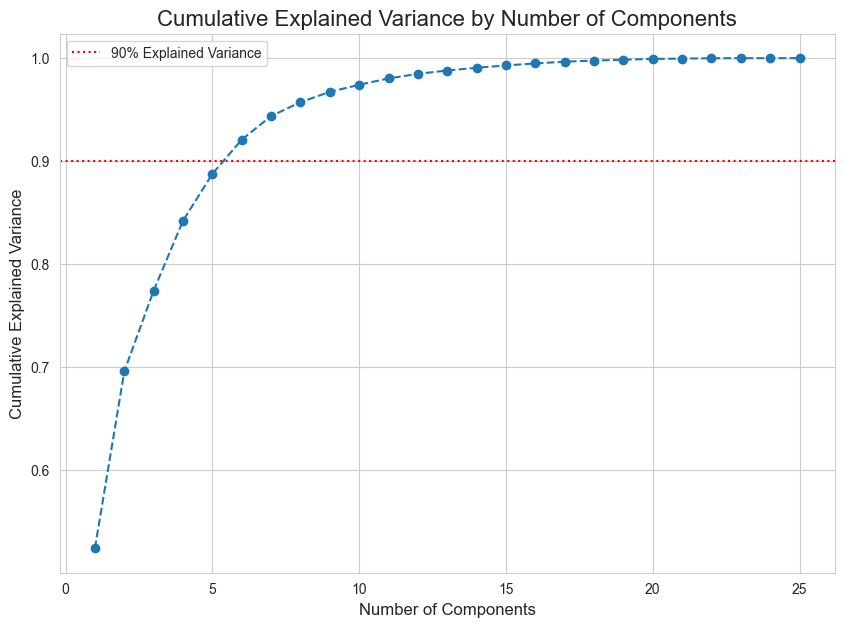

In [122]:
pca_full = PCA().fit(features_scaled)

plt.figure(figsize=(10, 7))
plt.plot(range(1, len(pca_full.explained_variance_ratio_) + 1), 
         np.cumsum(pca_full.explained_variance_ratio_), 
         marker='o', 
         linestyle='--')

plt.title('Cumulative Explained Variance by Number of Components', fontsize=16)
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance', fontsize=12)
plt.grid(True)
plt.axhline(y=0.90, color='r', linestyle=':', label='90% Explained Variance')
plt.legend()
plt.savefig(f'{FIGURES_PATH}pca_cum_variance_by_n_of_components.png', dpi=300)
plt.show()

### Key observations from PCA

1.  **High redundancy confirmed:** The steep initial curve of the explained variance plot confirms that the original features are highly correlated.

2.  **Optimal component range identified:** The "elbow" of the curve occurs between 2 and 3 components, thus indicating that the majority of the crucial information is captured within these first few components.

3.  **Data-Driven feature reduction:** The analysis provides a clear strategy for selecting the number of components. Approximately **7 components** are required to capture over 90% of the total variance, offering a robust trade-off between information retention and model simplicity.

4.  **Excellent class separability:** The 2D and 3D projections show that the data points form two distinct, well-separated clusters corresponding to the Malignant and Benign diagnoses. This gives high confidence that a machine learning model can perform well on this classification task.

## 7. Next Steps

This Exploratory Data Analysis has provided several key insights:
- The dataset is clean, with the only missing values being in a completely empty column (`Unnamed: 32`) that can be dropped.
- The target variable is slightly imbalanced, but not severely.
- Many features are highly correlated, confirming that dimensionality reduction techniques like PCA are appropriate.
- A clear separation between classes is visible, suggesting that machine learning models will perform well.
- We have identified a set of 5 features with very low correlation to the target, which can be dropped during preprocessing to reduce noise.

The next logical step is to formally preprocess this data to prepare it for modeling.

**Next Notebook:** [**2.0-Data_preprocessing.ipynb**](./2.0-Data_preprocessing.ipynb)